<a href="https://colab.research.google.com/github/JacoBotha-aau/JacoBotha_SDSPHD20_PortfolioAssignmentAnswers.ipynb/blob/main/JacoBotha_SDSPHD20_PortfolioAssignmentAnswers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio for SDSPhD20

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

_______

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* "supervised machine learning with penguins".

## Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

### Data and libraries

In [ ]:
# Import requried packages

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

### Inspecting the dataset
In this section, we inspect the dataset to see what we are working with. For this, we use the functions `head`, `info`, and `describe`, where we can access essential information regarding the variable names, their types, summary statistics for numerical variables and also the general shape of the dataframe. 

#### Head

One of the first things one should consider when looking at data is looking at either the first or last couple of lines in the dataset to see if it was imported correctly. This can either be done with the `head()` or `tail()` functions.

In [ ]:
penguins.head() # Visually inspect first couple of rows of data.

species_short     island  ...  body_mass_g     sex
0        Adelie  Torgersen  ...       3750.0    MALE
1        Adelie  Torgersen  ...       3800.0  FEMALE
2        Adelie  Torgersen  ...       3250.0  FEMALE
3        Adelie  Torgersen  ...          NaN     NaN
4        Adelie  Torgersen  ...       3450.0  FEMALE

[5 rows x 7 columns]

From looking at the first couple of lines of the dataframe, we can see that we have some NaNs present in the dataset. This could cause problems later on when we have to do machine learning, so this is something we would have to look into.

#### Info

Next, when we are certain that our data has been imported correctly, we can then inspect each variable in the dataframe separately by using the `info()` function. This funtion provids information on on the column index, column name, how many non-null entries each column contains and also the type of variable the column is encoded as.

In [ ]:
penguins.info() # Provide info on variables in data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


By looking at the info of each variable in the dataset, we see that we have different types of variables. First, we have the short species name and the island on which they are located, which are both objects/string variables. Next, we have culmen length, culmen depth, flipper length and body mass, which are all floats. Finally, we have sex, which is an object/string variable as well.

We additionally see that there are different numbers of NaNs in each column, which is a common occurence in data sets. This also reinforces the idea of having to fix it at a later stage.

#### Describe

Finally, one can use the `describe()` function to calculate descriptive statistics for all of the numerical (float/integer/boolean) columns. This can provide one with a quick overview of whether the scaling of data is appropriate to what is expected, and also whether there are severe outliers present (*ie.* if the mean or standard deviation differ significantly from what is expected).

In [ ]:
penguins.describe() # Describe the variables in dataset.

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

By diong this, we can see that all fo the numerical varaibles are within a range that could be expected for penguins (*ie.* culmen length is 43.9 mm, culmen depth is 17.2 mm, flipper length is 200.9 mm and body mass is around 4200 g on average). So, there are no bells and wistles regarding the quality of data here, and it seems like we are working with reasonable data.

### Exploratory data analysis

The next step for any dataset would be to perform some sort of exploratory data analysis. One of the quickest and easiest ways of getting a feel for the data is to do some visualisation.

A quick and easy way to do this is to construct what is called pairplots. Here, we plot histograms for each of the numerical variables, where we can inspect the distribution of the data, and we plot each variable against all other variables in scatter plots, where we can look at correlations and also how different subgroups of data can be seperated from others.

One way of doing this very easily is using the `pairplot()` function in the seaborn package.

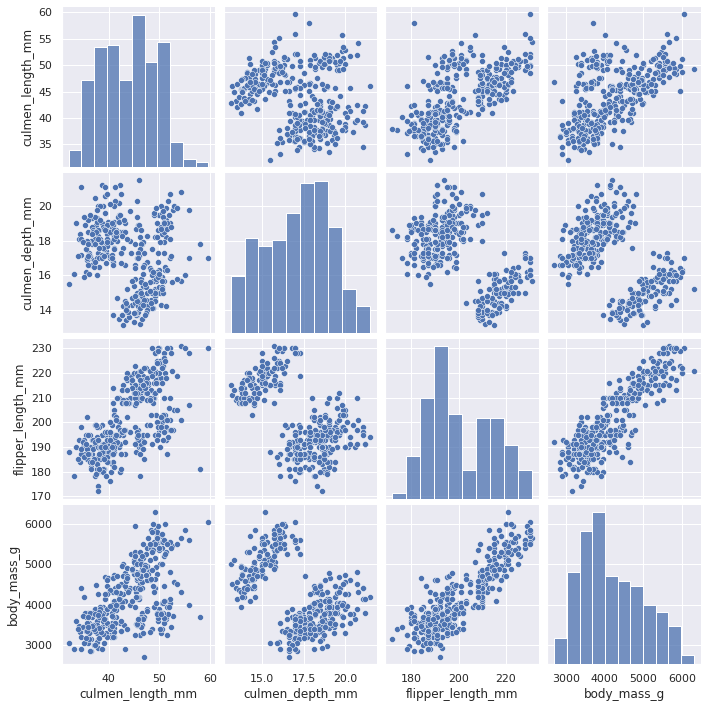

In [ ]:
sns.pairplot(penguins) # Constructs 'pairplots' of numerical variables.

Several interesting things can be seen when inspecting the data presented on the pair plots. First, when looking at the histograms of each variable, it is clear that there are two distinct populations present for some of the variables (*ie.* flipper length and culmen length). By looking at the scatterplots, we get an even better seperation of the groups (*ie.* culmen depth vs. body mass and flipper length vs. culmen depth), and we can also see that there is some correlation between several of the variables (*ie.* body mass vs. flipper length and body mass vs. culmen length).

While this is usefull to some extent, it would be even more usefull to see how the three different species of penguins are distributed in these plots. Here, we can specify the `hue` argument of the `pairplot` function to be performed by the `species_short` variable.

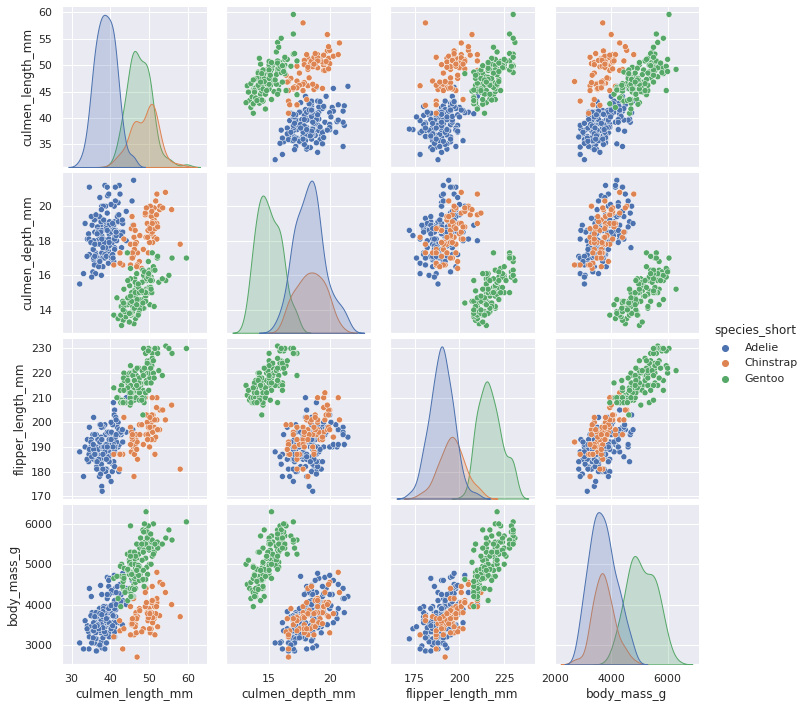

In [ ]:
sns.pairplot(penguins, hue = 'species_short') # Constructs 'pairplots' of numerical variables colored by species_short.

By doing this, we get a more informed idea about how the different species are distributed in each variable. Here, we can also see that different variable combinations can separate different species (*ie.* culmen length vs flipper length separates Gentoo from Chinstrap and Adelie, and culmen length vs. culmen length separates Adelie from Chinstrap and Gentoo). However, regardless of which combination of parameters we use, there is still some overlap between groups preventing their total separation from each other. Also, investigating all different variable combinations to find adequate separation between all groups becomes quite laborious and even impossible for larger or huge datasets.

### Principle Component Analysis (PCA)

One way of aiding the discovery of interesting patterns and features is reducing dimensions. A popular method of doing this is using the principle component analysis (PCA), where eigen vectors are constructed along the variance in the data, where the first component would describe the axis of the largest variance, the second component the second largest and so on. By doning this, we gain variables that maintain most of the variance in the data, however we lose the correlation. As such, the components become orthogonal to eachother.

#### Libraries

In [ ]:
# Import the functions we need
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library.
from sklearn.preprocessing import StandardScaler # Imports the standard scaler function for centering and normalising data.

#### Pre-processing

One of the first steps in performing PCA is to make sure that all variables are of a type that is usefull to the analysis in question. When performing PCA, it is a good idea to either move interesting categorical variables to the index or to encode them numeriacally (*ie.* giving sex values 1 for male and 0 for female).

Befre we do this, however, we have to remove th NaNs, as these might cause problems for the encoder.

In [ ]:
penguins.set_index('species_short', inplace=True) # Moves the categorical variable of interest to the index.

In [ ]:
penguins.dropna(axis=0, how='any', inplace=True) # Drops rows with NaNs

In [ ]:
print(penguins.sex.unique())
print(penguins.island.unique())

['MALE' 'FEMALE' '.']
['Torgersen' 'Biscoe' 'Dream']


After removing the NaNs, investigating the island and sex variables revealed the sex variable still contains some unexpected values, namely '.'. Thus, in order to get a cleaner dataset, we remove the observations with these values.

In [ ]:
penguins_clean = penguins[penguins.sex != '.'] # Removes observations with '.' in the sex variable.

Next, we construct two new data frames. The first will contain our numerical values to use in the PCA, and the next the descriptive variables such as sex and island. Here, we simply create two new dataframes containing these variables.

In [ ]:
vars_analysis = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
vars_categorical = ['island', 'sex']

penguins_vars = penguins_clean.loc[:,vars_analysis]
penguins_categorical = penguins_clean.loc[:,vars_categorical]

#### Scaling and normalisation

In order to perform a PCA, there are some initial steps to consider. First, in order to aid in reading/understanding the PCA, we need to center the data and also normalise it. While there are many ways to do this, one of the most commonly used methods is using a standard scalar, where the mean og each vairable is subtracted from each value in the varaible, after which the values are divided by the standard deviation of the corresponding variable. This can be expressed as:

$$StandardScale() = {\frac {X-\mu }{\sigma }}$$

This can be achieved by using the `StandardScaler` function from the `sklearn.preprocessing` sub-package.

In [ ]:
scaler = StandardScaler() # Defines a variable that describes which scaler will be used to scale/normalise data.
penguins_vars_scaled = scaler.fit_transform(penguins_vars) # Scales and normalises data.

#### Executing the model

Next, we can execute the PCA, where we calculate the eigen vectors for the data and scale it an the variables according to these eigen vectors.

In [ ]:
# Instantiate a PCA object
model = PCA() # Number of components needs to be defined.

In [ ]:
# Fiter the model
model.fit(penguins_vars_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Fit and transform the data
penguins_vars_reduced = model.transform(penguins_vars_scaled)

#### Inspecting the model

Next, after we have executed and fitted the model to the data points, and we have calculated to loadings of variables on the principle components, we can inspect the PCA by plotting the data points on the different components.

However, in order to gain the most useful information possible from scaling the data to the principle components, we first need to investigate how many components we reasonably need to explain the variance in the data.

To do this, we can start by constructing a cumulative variance plot for all of the calculated principle components.

Text(0, 0.5, 'Variance')

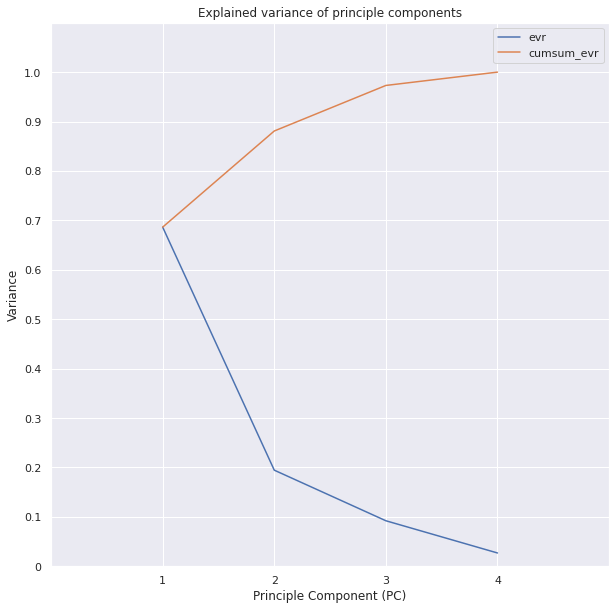

In [ ]:
## Constructs a plot over the variance and cumulative variances explained by the different components in the model.

# Constructs a data frame from a dictionary containing the varinace and cumulative variance.
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()

# Sets figure parameters for plot.
sns.set(rc={'figure.figsize':(10,10)})

#Creates a line plot of the variance and cumulative variance.
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0)+1, hue=plot_data.index.get_level_values(1))

# Makes the plot look "nice".
plt.title('Explained variance of principle components')
plt.axis([0, 5, 0, 1.1])
plt.xticks([1, 2, 3, 4], [1, 2, 3, 4])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xlabel('Principle Component (PC)')
plt.ylabel('Variance')

Form this figure, we can see that the first component explains approximately 69% of the total variance, while the second component explains an additional 20%. The third and fourth components account for less than 10% of the variance each, making them less relevant for the model. Thus, with only the first 2 components, we reach about 88% of the total variance in the model, and it would probably be adequate just to use these.

Next, we can investigate whether having fitted the data to the first two components has revealed some paterns in the data. To do this, we again construct a scatter plot of the fotted data on the first and the second component.

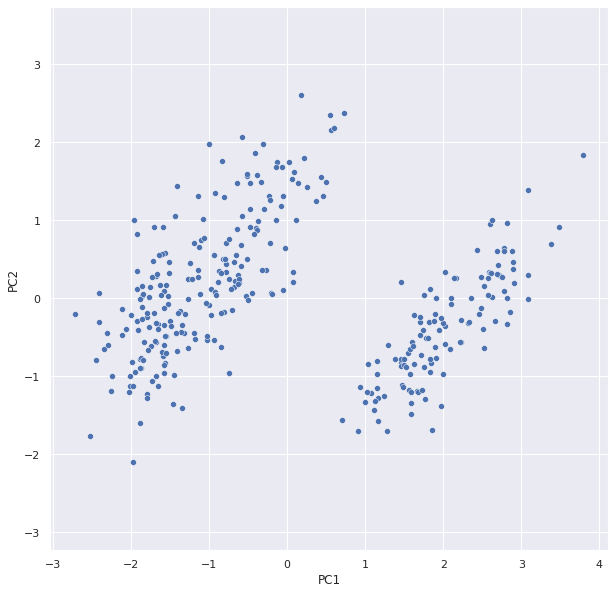

In [ ]:
# Construct a scatter plot of the first 2 components
sns.scatterplot(x = penguins_vars_reduced[:,0], y = penguins_vars_reduced[:,1])

# Makes the plot look "nice".
plt.axis('equal')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

From this, we can again see that there are two distinct groups present in the data. However, how the three groups actually distribute is still a bit difficult to see from this figure.

In order to improve it, we could plot the same figure but label the values according to species. We could also, for the sake of being thorrough, plot the first with the second and third components in order to see whether we have a better separation.

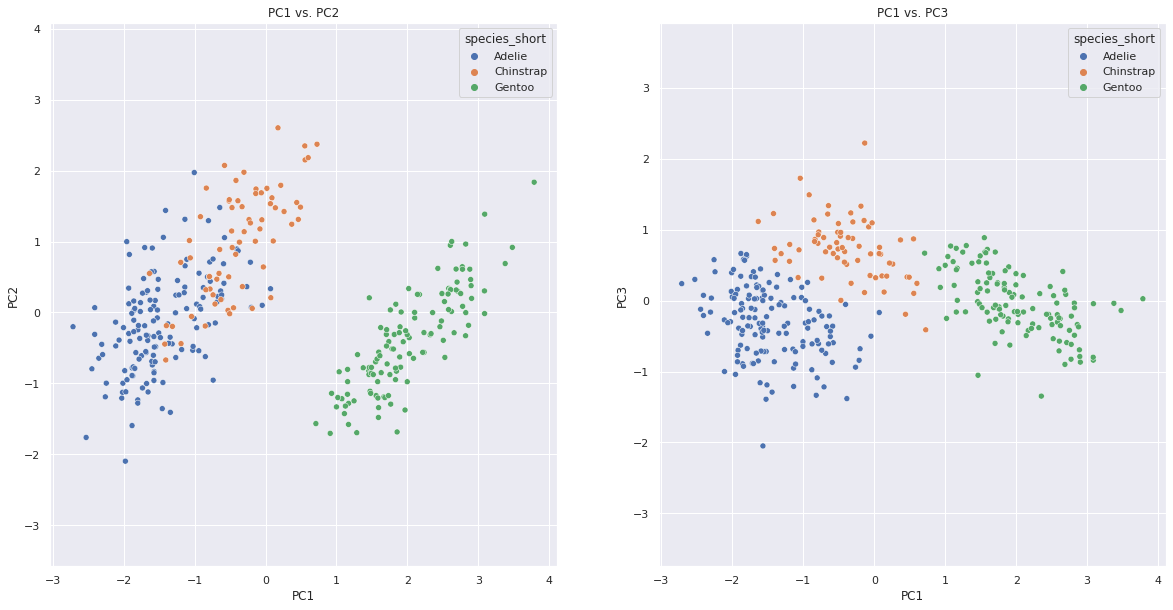

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

# Construct a scatter plot of the first 2 components
sns.scatterplot(x = penguins_vars_reduced[:,0], y = penguins_vars_reduced[:,1], hue = penguins_vars.index, ax=ax1)

# Makes the plot look "nice".
ax1.axis('equal')
ax1.set_title('PC1 vs. PC2')
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")

# Construct a scatter plot of the first 2 components
sns.scatterplot(x = penguins_vars_reduced[:,0], y = penguins_vars_reduced[:,2], hue = penguins_vars.index, ax=ax2)

# Makes the plot look "nice".
ax2.axis('equal')
ax2.set_title('PC1 vs. PC3')
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC3")

# Shows the plot
plt.show()

As previously, Chinstrap and Adelie penguins still cluster more or less together and are hard to discriminate from each other on PC1 and PC2. However, when taking PC3 into account, the three groups are distinguishable on PC1 vs. PC3.

Next, in order to find out which factors are mostly responsible for generating these patterns, we have to look at hte loadings of the model - in essence how each of the variables from the raw, un-fitted data affects each component.

To do this, we can construct a loadings plot.

In [ ]:
## Extracting component scores and loadings from the model for plotting.

pcscores = pd.DataFrame(penguins_vars_reduced) # Component scores from reduced matrix.
loadings = pd.DataFrame(model.components_, columns=penguins_vars.columns) # Loadings from model.
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))] # Assigns component numbers as index to loadings.

[Text(0, 0.5, 'culmen_length_mm'),
 Text(0, 1.5, 'culmen_depth_mm'),
 Text(0, 2.5, 'flipper_length_mm'),
 Text(0, 3.5, 'body_mass_g')]

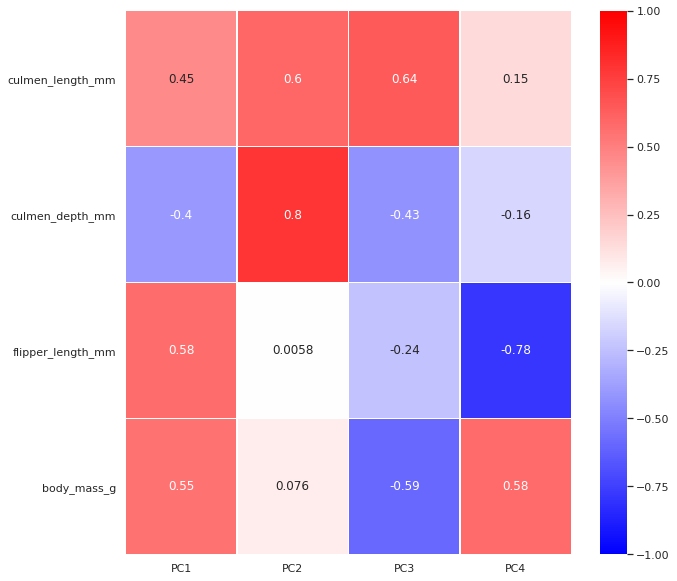

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bwr", vmin=-1, vmax=1, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

Now, we construct the component plots from above with the loadings of the variables as well to investigate how each variable influences how the points are distributed in the component space.

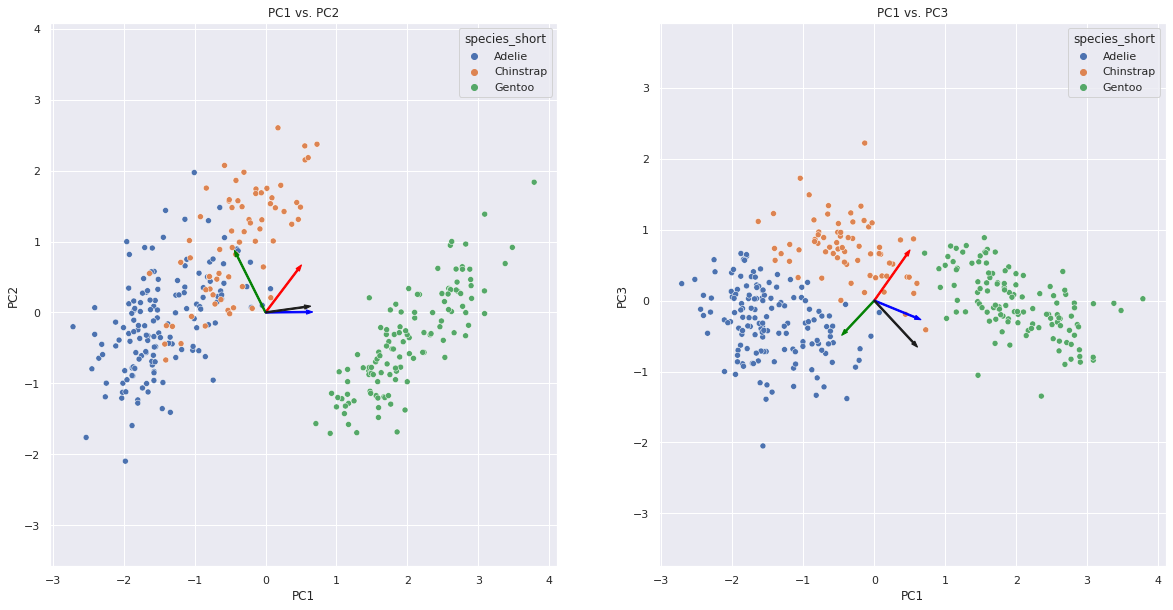

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

# Construct a scatter plot of the first 2 components
sns.scatterplot(x = penguins_vars_reduced[:,0], y = penguins_vars_reduced[:,1], hue = penguins_vars.index, ax=ax1)

# Makes the plot look "nice".
ax1.axis('equal')
ax1.set_title('PC1 vs. PC2')
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")

# Adds the loadings as arrows to the plot.
ax1.arrow(0, 0, loadings['culmen_length_mm'][0], loadings['culmen_length_mm'][1], color = "red", width=0.02)
ax1.arrow(0, 0, loadings['culmen_depth_mm'][0], loadings['culmen_depth_mm'][1], color = "green", width=0.02)
ax1.arrow(0, 0, loadings['flipper_length_mm'][0], loadings['flipper_length_mm'][1], color = "blue", width=0.02)
ax1.arrow(0, 0, loadings['body_mass_g'][0], loadings['body_mass_g'][1], color = "k", width=0.02)

# Construct a scatter plot of the first 2 components
sns.scatterplot(x = penguins_vars_reduced[:,0], y = penguins_vars_reduced[:,2], hue = penguins_vars.index, ax=ax2)

# Adds the loadings as arrows to the plot.
ax2.arrow(0, 0, loadings['culmen_length_mm'][0], loadings['culmen_length_mm'][2], color = "red", width=0.02)
ax2.arrow(0, 0, loadings['culmen_depth_mm'][0], loadings['culmen_depth_mm'][2], color = "green", width=0.02)
ax2.arrow(0, 0, loadings['flipper_length_mm'][0], loadings['flipper_length_mm'][2], color = "blue", width=0.02)
ax2.arrow(0, 0, loadings['body_mass_g'][0], loadings['body_mass_g'][2], color = "k", width=0.02)

# Makes the plot look "nice".
ax2.axis('equal')
ax2.set_title('PC1 vs. PC3')
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC3")

# Shows the plot
plt.show()

In this figure, we can see how the variables influence the position of the points in the component space, and which variables can give ample separation. Each variable is plotted as a vector depicting its loading in the corresponding component space. The variables have the following colors:
- **Red**: Culmen length in mm
- **Green**: Culmen depth in mm
- **Blue**: Flipper length in mm
- **Black**: Body mass in g

As we could see previously from the pairplots of the variables, Gentoo penguins were generally larger than Chinstrap and Adelie penguins, and they also had longer flippers. As such, it is not surprising that the relatively large positive loadings on PC1 (body mass: 0.55; flipper length: 0.58) can separate Gentoo from the other penguins. Even though culmen depth has a negative loading on PC1 (-0.4) and culment depth a  positive loading on PC1 (0.45), both of these have a positive loading on PC2 (culmen depth: 0.8; culmen length(0.6), which results in poor separation of Chinstrap to Adelie.

However, when looking at the PC1 vs. PC3 space, these variables are body mass and flipper length have similar directionality and loadings on PC1 and PC3, while culmen depth and culmen length are now almost completely in opposite directions. Thus, it is possible to separate all three groups of penguins adequately from each other in the PC1 vs. PC3 space, as Gentoo penguins have a higher weight and flipper length than the other species, and chinstrap penguins have a larger culmen depth than Adelie penguins.



---

## Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Apply standard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

### Libraries

In [ ]:
## Loads libraries required for supervised machine learning.

# Pre- and post-processing functions.
from sklearn.preprocessing import LabelEncoder # Function for encoding labels.
from sklearn.model_selection import train_test_split # Function for splitting data into training and test sets.
from sklearn.model_selection import cross_val_score # Function for K-fold cross-validation.
from sklearn.metrics import classification_report # Function for generating classification reports on performance evaluation.
from sklearn.metrics import confusion_matrix # Tools for creating a confusion matrix.

# Machine learning models.
from sklearn.linear_model import LogisticRegression # Function for doing logistic regression models.
from sklearn.ensemble import RandomForestClassifier # Function for doing random forrest models.
import xgboost as xgb # Function for XGBoost ML model.

### Additional modules

In [ ]:
# Remove old version of MLxtend library from environment.
!!pip uninstall -qq mlxtend -y

[]

In [ ]:
# Install an updated version of the MLxtend library.
!pip install -qq -U mlxtend

     |████████████████████████████████| 1.4MB 12.6MB/s 


In [ ]:
from mlxtend.plotting import plot_confusion_matrix # For easy plotting of confusion matrices.

### Pre-processing of data

In order to be able to perform the models, some pre-processing is necessary. Even though we have cleaned and scaled the data above, we still need to split the data into independant variables and dependent variables.

In [ ]:
X = penguins_vars_scaled # Scaled numerical data from penguins dataset.
y = penguins_clean.index # Species data from penguins dataset.

In [ ]:
## Initialises encoder and encodes species data.
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

In [ ]:
## Inspect encoding of data.
print(y)

Index(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie',
       ...
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo'],
      dtype='object', name='species_short', length=333)


In [ ]:
## Inspect encoding of data.
print(y_enc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Next, we split the data into a training set consisting of 80% of the data for constructing the model and a test set consisting of the remaining 20% of the data for validating the model.

In [ ]:
# Split data with 20% for testing and 80% for training.
# Random state defined with an arbitrary number for reproducibility.

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size = 0.2, random_state = 123)

In [ ]:
## Inspect the training and test data sets.
print(X_train.shape, len(y_train))
print(X_test.shape, len(y_test))

(266, 4) 266
(67, 4) 67


### Logistic regression

Now that we have our training and test data sets, we can start to train the model. In the first instance, we will try to apply a logistic regression model on the data and see if we can accurately predict the species of penguin based on culmen length, culmen width, flipper length, and body mass.

To do this, we will first devide our training data set (which is constituted of 80% of our complete data set) into 5 chunks and use 4 of them to train the model and the last one to validate it.

In [ ]:
# Define the model.
model = LogisticRegression(max_iter=2000)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.98148148 1.         1.         0.98113208 0.98113208]


From this, we could see that the model performed fairly well over the five iterations of the cross-validation classifying between 98.11% and 100% of the cases correctly.

Now that we have a model that we can rely on, which has performed well with the training dataset, we will test on our test set consisting of 20% of our total data.

In [ ]:
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

0.9552238805970149


Here, too, we are able to calssify approximately 95.5% of cases correctly, which is quite good. We can now dive a bit deeper into the model and look at other statistics, which might reveal a bit more about how the model performs.

First, we can generate a classification report in which we can investigate which cases the model is having trouble with. Next, we can plot a confusion matrix.

In [ ]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names = target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       0.90      1.00      0.95        28
   Chinstrap       1.00      0.85      0.92        20
      Gentoo       1.00      1.00      1.00        19

    accuracy                           0.96        67
   macro avg       0.97      0.95      0.96        67
weighted avg       0.96      0.96      0.95        67



(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff76fcc3278>)

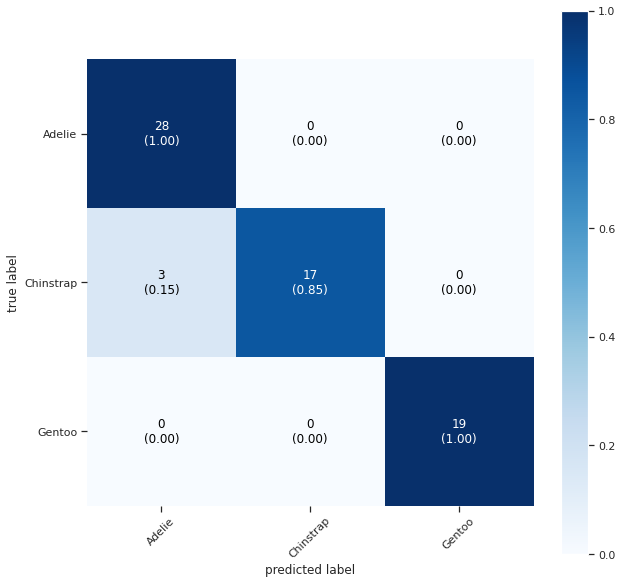

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

From this report we can see that the model is having some trouble with precision in classifying Adelie correctly and also the recall of Chinstrap penguins. Specifically, it is classifying some of the Chinstrap Penguins as Adelie penguins.

As we could see above, these penguins are in fact quite close to eachother in most of the investigated variables with much overlap (culmen depth, flipper length and body mass) with only some separation with regards to culmen length. However, even though there was separation on culment length, there still was some overlap. So this result was not altogether unsurprising.

### Random forest model

Even though the results from the logistic regression looked quite good with an accuracy of 95.5%, we would like to get closer to 100%. To do this, we could try to employ another more complex method to see if this could increase our accuracy.

This method would be the random forest method. To construct the model, we can, again, use the same data we pre-processed for the logistic regression - only this time, we apply the random forest method on it.

In [ ]:
# Define the model.
model_RF = RandomForestClassifier()

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores_RF = cross_val_score(model_RF, X_train, y_train, cv = 5)
print(scores_RF)

[0.96296296 1.         1.         0.9245283  0.9245283 ]


In [ ]:
# Model training
model_RF.fit(X_train, y_train)

# Model performance on the test-set
print(model_RF.score(X_test, y_test))

0.9552238805970149


In [ ]:
# Performance evaluation using the classification_report

y_pred_RF = model_RF.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred_RF, target_names = target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       0.90      1.00      0.95        28
   Chinstrap       1.00      0.85      0.92        20
      Gentoo       1.00      1.00      1.00        19

    accuracy                           0.96        67
   macro avg       0.97      0.95      0.96        67
weighted avg       0.96      0.96      0.95        67



(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff77ada6a90>)

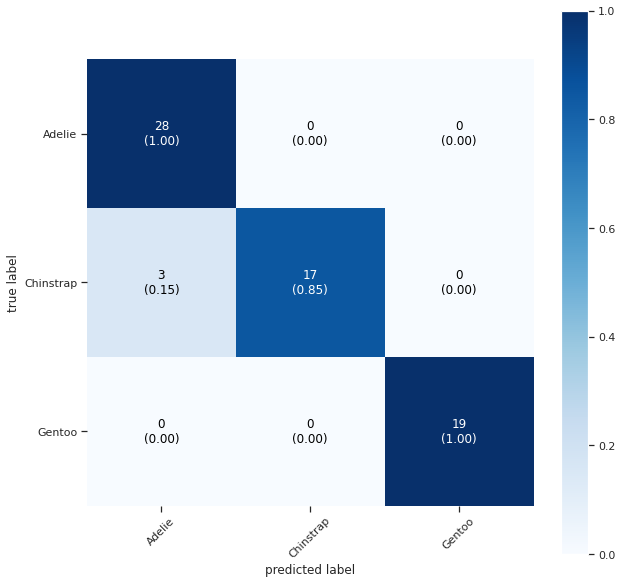

In [ ]:
# calculate the confusion matrix
confmatrix_RF = confusion_matrix(y_test,y_pred_RF) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix_RF,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

Interestingly, we did not get a different result from applying a random forest model on the data. In fact, the accuracy of the model stayed the same as with the logistic regression (95.5%), and the precision and recall for Adelie and Chinstrap penguins, respectively, remained at 90% and 95%, respectively., regardless of increased complexity in the model.

While this is still a good result, it was a bit disapointing that the model did not perform better than the less complex logistic regression. THis could, however, be due to the nature of the data (groups are already quite separable based on the recorded features) and also the size of the dataset (67 observations = quite small). 

### XGBoost

So, to give this a final shot, we could incorporate another method called XGBoost. Here, however, we will use standard parameters and avoid hyperparameter tuning, even though this could give poorer results, as the size of this dataset could be a limiting factor for tuning parameters.

In [ ]:
model_XG = xgb.XGBClassifier()

scores_XG = cross_val_score(model_XG, X_train, y_train, cv = 5)
print(scores_XG)

NameError: ignored

In [ ]:
model_XG.fit(X_train, y_train)
print(model_XG.score(X_test, y_test))

NameError: ignored

In [ ]:
# Performance evaluation using the classification_report

y_pred_XG = model_XG.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred_XG, target_names = target_names)) #Print out the report

In [ ]:
# calculate the confusion matrix
confmatrix_XG = confusion_matrix(y_test,y_pred_XG) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix_XG,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

Again, as with the random forest method, we do not see an overall performance increase with the XGBoost model in predicting which species a penguin stems from, as accuracy is still 95.5%, and it still classifies some Chinstrap penguins as Adelie penguins, yielding a precision of 90% for Adelie classification and a recall of 85% for Chinstrap classification.

## Conclusion


As such, we could with 95.5% accuracy classify which race a penguin belongs to based on culmen length, culmen width, flipper length and body mass alone. Random Forest and XGBoost did not perform better than logistic regression at classifying penguins according to their respective species, and all three methodologies shared the same caveats. This could, however, be a feature in the data, and more observations or a new set of measurements would be required to properly evaluate these methods side-by-side.

---

# Portfolio assignments for Wednesday

**Requirement:** Work on solutions for *either* the network analysis case study 1 or case study 2 *and* the exercise for spatial stuff.

## Network analysis: Case Study 1: Directed Networks: Friends & Foes at Work

### Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

#### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

#### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

### Data preperation

#### Packages

In [5]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

Requirement already up-to-date: bokeh in /usr/local/lib/python3.6/dist-packages (2.2.3)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx
import community # `python-louvain` is implemented here

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
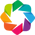

In [7]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

####  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

(the cell belows reads in the tables, performs some recoding and cleanup and creates network objects for the 3 data sets).

In [8]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
#attributes.set_index('id',inplace=True)
attributes.drop("id", axis=1, inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

print(nx.get_node_attributes(G_friendship, 'seniority'))

{0: 'Partner', 1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Associate', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Assoc

#### Calculate dimensional centralities

There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.

In [9]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [10]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [11]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [12]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

In [13]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [14]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

#### Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126

In [15]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

0.5521474668051333

In [16]:
nx.attribute_assortativity_coefficient(G_advice, 'seniority')

0.31988773380347335

In [17]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

0.05499057128064334

In [18]:
nx.attribute_assortativity_coefficient(G_advice, 'school')

0.02685135386022897

In [19]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

0.6005659002727841

In [20]:
nx.attribute_assortativity_coefficient(G_advice, 'office')

0.47558171223501833

In [21]:
nx.attribute_assortativity_coefficient(G_friendship, 'practice')

0.18324899491432978

In [22]:
nx.attribute_assortativity_coefficient(G_advice, 'practice')

0.46058556200129835

#### Reciprocity

Anotyher interesting question usually is, if directed edges are reciptocated, meaning that an edge between `i,j` makes an edge between `j,i` more likely

In [23]:
nx.overall_reciprocity(G_friendship)

0.6121739130434782

### The assignment

Explore the network further.

1. Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?
2. Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)
3. Visualize these communities (static or dynamic)

### Differences in reciprocity of advice and work networks


Here, we investigate whether there are differences in the rates at which edges are reciprocated between nodes (*ie.* if node A and B are connected from A to B and from B to A) for work and advice networks.

In [24]:
print("Work reciprocity: " + str(nx.overall_reciprocity(G_work)))
print("Advice resiprocity: " + str(nx.overall_reciprocity(G_advice)))

Work reciprocity: 1.0
Advice resiprocity: 0.3923766816143498


From this analysis, it is immediately evident that the reciprocity in the two networks are different. In order to understand this result, it could be wise to look at the way the wuestions on the questionaire were formulated regarding work and advice, and also how hierarchy and experience might affect the directionality of relationships in this case.

When looking at the reciprocity of the work network, it is not surprising that the result is 1 corresponding to 100% of edges being bi-directional. When looking at how the question for this was framed, there are several elements that could allude to the reason for this result. First, work included anything ranging from having read and used each others' work to working on cases together in any professional capicity within or outside one's own company. Second, the question is also specifically framed as to include anything from oneself having read and used a colleague's work to a colleague having read and used one's own work. As such, it is no surprise that there is complete reciprocity in this network, as when person "A" has worked with person "B", person "B" would also have worked with person "A".

On the other hand, when looking at reciprocity in the advice network, the number is much lower. A simple explenation for this could be seniority, as juniors are much more likely to seek advice from seniors than the other way around. In addition, some individuals in the network might also have a higher frequency of seeking advice from others due to the general complexity of cases they are assigned to, personal/work habits etc., while others might be more independant. As such, it is not really a surprise that the reciprocity in this network is much lower than in the work network.

### Communities

Another interesting feature to investigate is how the different nodes form communities by essentially looking at how nodes are connected with respect to having a maximal within-connectivity, while they have a minimal between connectivity with other groups or nodes in other groups. As such, a community could be defined as a group or cluster of nodes, where the propability of being connected to one another is higher than being connected to any nodes in other groups/communities.

One method of discovering communities is using Louvain algorithm, which is one of the most commonly used algorithms used for community detection. This method merges nodes together with their neighbors as long as the modality factor increases. After nodes are clustered into many small communities, the algorithm takes these small groups as an input and again attempts to merge the groups toghetehr in the same fashion, until it is not possible to increase the modality factor. When this is done, the communities are defined.

Here, we will perform community analysis for the advice and friendship networks.

Before we can do this, however, we need to convert the directed graphs into un-directed graphs - even though the Louvain algorithm can perform reasonably well with weighted and directed networks. To do this, we can use the `to.undirected()` function of the `networkx` package.

In [25]:
G_advice_undirected = G_advice.to_undirected()

In [26]:
G_friendship_undirected = G_friendship.to_undirected()

Now that we have undirected matrices, we can perform the analysis. First, we do this for the advice network and after that display the number of communities detected by the algorithm. After that, we display these communities in an interactive figure.

In [27]:
# Find the optimal partition with the Louvain algorithm.
com_advice = community.best_partition(G_advice_undirected)

In [28]:
# The number of communities detected
max(com_advice.values())+1

3

In [29]:
nx.set_node_attributes(G_advice, com_advice, 'community')

g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                  #node_size='cent_degree', 
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

The Louvain algorithm discovered 3 communities in the advice network. When cycling through the nodes in the three groups, it becomes evident that one of the factors that determine whether nodes cluster together are office location and practice. As such, lawyers with their office location in Boston would likely cluster with other lawyers in Boston, and litigation lawyers would likely cluster with other litigation lawyers. Also, this is confirmed by the relatively high assortativity numbers for office and practice, which were 0.48 and 0.46, respectively. One observation is striking, however. While litigation and corporate layers tend to be clustered separately in Boston, they cluster together in Hartford.

Next, we do the same for the freindship network.

In [33]:
# Find the optimal partition with the Louvain algorithm.
com_friendship = community.best_partition(G_friendship_undirected)

In [34]:
# The number of communities detected
max(com_friendship.values())+1

6

In [35]:
nx.set_node_attributes(G_friendship, com_friendship, 'community')

g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                  #node_size='cent_degree', 
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

The Louvain algorithm discovered 6 communities in the friendship network, of which two of the nodes form their own communities. When cycling through the nodes in the six groups, it is much less clear which factors determine whether individual nodes form a community.

As such, we can turn to the assertativity of the different factors. The main factor that could influence clustering together is office location, which has an assortativity score of 0.60. Next, seniority seems to play a role in this as well having an assertativity score of 0.55. Practice has a much lower impact (assertativity: 0.18) and school even less os (assertativity: 0.05). As such, lawyers with an office in the same location and also the same seniority level would be more likely to group together than lawyers with offices in different locations or different seniority levels.

## Exercise for spatial stuff

So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

- OPEN_DATA_STOEJDATA_VIEWPoint.shp

This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.

### Loading packages

In [1]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

In [2]:
# Loading required packages

import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


### Loading and processing data

In this section, we will load data for noise levels in different locations in Denmark, Data on municipalities, and also data on psychiatric hospitalizations in each municipality.

In [3]:
# Download and unzip shape files

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

--2020-12-11 15:01:32--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip [following]
--2020-12-11 15:01:32--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 951658 (929K) [application/zip]
Saving to: ‘shapefiles_exercise.zip.6’

shapefiles_exercise 100%[===================>] 929.35K  --.-KB/s    in 0.04s   

20

In [4]:
!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip" # Downloads data files
!unzip shapefiles.zip # Unpacks data files

--2020-12-11 15:01:41--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip [following]
--2020-12-11 15:01:41--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32728265 (31M) [application/zip]
Saving to: ‘shapefiles.zip.3’

shapefiles.zip.3    100%[===================>]  31.21M  84.9MB/s    in 0.4s    

2020-12-11 15:01:43 (84.9 MB/s) - ‘sh

In [5]:
# Load the data
stoejdata = gdp.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp") # Stoejdata

municipalities = gdp.read_file("KOMMUNE.shp") # Municipality data
mun = municipalities.dissolve(by='KOMNAVN') # Dissolves municipality data into municipalities

mun_data=pd.read_excel("https://github.com/CALDISS-AAU/sdsphd20/raw/master/datasets/spatialdata.xlsx") #Psych data

mun_fun = mun.merge(mun_data, left_on='KOMNAVN', right_on="omr", how='left', validate="one_to_one") # Merging municipality data and psych data

#### Converting all data to same coordinate system for plotting

In this part, we convert all data into the same coordinate system, so that the noise level data can be correctly assigned to municipalities, and also so that the data can be plotted in the same geographic area.

First, we access information on the current coordinate system of the data sets by displaying the `crs` attribute of the data sets.

In [6]:
stoejdata.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 83.92)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
mun_fun.crs

<Projected CRS: PROJCS["UTM32_EUREF89",GEOGCS["GCS_EUREF89",DATUM[ ...>
Name: UTM32_EUREF89
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: EUREF89
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

From this, we can see that the noise level data and municipalities data use different coordiante set, namely EPSG:25832 and UTM32_EUREF89, respectively.

In order to get them into the same coordinate system, we convert both dataframes to EPSG: 3857.

In [8]:
stoejdata = stoejdata.to_crs(epsg=3857)
mun_fun = mun_fun.to_crs(epsg=3857)

In [9]:
stoejdata.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
mun_fun.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Joining noise level data and municipalities data

Now that we have successfully converted both coordinate systems to EPSG:3857, we can join the noise level data set and the psych ration dataset.

In [11]:
stoej_in_mun = gdp.sjoin(stoejdata, mun_fun, how="right", op='within')

In [12]:
stoej_in_mun.head()

index_left DATAEJER  VEJBESTYRE  ...  alt2016 psyk2016 psykratio
0      7277.0        0         0.0  ...   7016.0    109.0  0.015536
0      7580.0        0       580.0  ...   7016.0    109.0  0.015536
0       939.0      580       580.0  ...   7016.0    109.0  0.015536
0      7276.0        0         0.0  ...   7016.0    109.0  0.015536
0      3195.0      580       580.0  ...   7016.0    109.0  0.015536

[5 rows x 64 columns]

Now that we have our data sucessfully merged, the data from the steojdata is still present as single locations. In order to get a better idea of how noise levels and psychiatric hospitalizations correlate at a municipality level, we have to aggregate our data at the municipality level. One way of summarizing the noise levels would be to calculate the average noise level in the municipalities.

In [13]:
stoej_in_mun['avgstoej'] = stoej_in_mun['GNSHAST071'].groupby(stoej_in_mun['omr']).transform('mean')

### Visualizing noise and psychiatric hospitalizations

Finally, now that we have calculated the average noise levels for each municipality, we can visualize this data and the psychiatric hospitalization data and inspect the visualizations for correlations.

Text(1077.2181818181816, 0.5, 'Latitude')

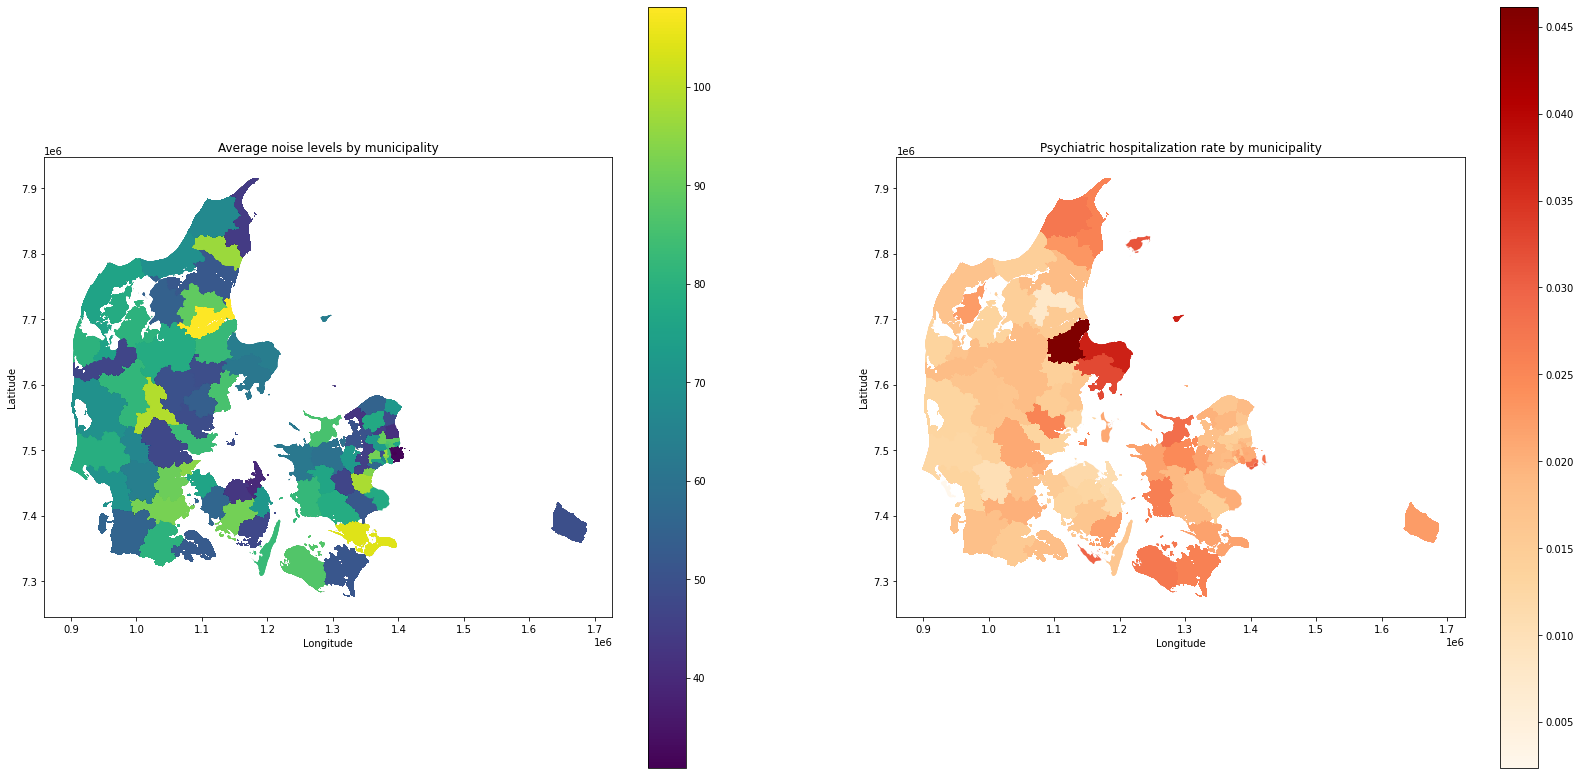

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (28, 14))
stoej_in_mun.plot(column="avgstoej", legend="True", ax = ax1)
ax1.set_title('Average noise levels by municipality')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
stoej_in_mun.plot(column="psykratio", legend="True", cmap='OrRd', ax = ax2)
ax2.set_title('Psychiatric hospitalization rate by municipality')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

By looking at the two maps, there does not seem to be much of a correlation between the average noise levels in each municipality and the psychiatric hospitalization rates in the same municipalities. As an example, when looking at the average noise levels, Mariagerfjord, Ikast-Brande, Vordingborg and Køge Kommune have high average levels of noise, whereas Dragør, Tårnby, København and Kerteminde Kommune have low levels. When looking at psychiatric hospitalizations in just these eight municipalities, Tårnby, Dragør and København Kommune have relatively high psychiatric hospitalization rate regardless of their low average noise levels, while Mariagerfjord, Kerteminde and Ikast-Brande Kommune have low psychiatric hospitalization rates regardless of their high average noise levels.

Several factors could have influnced this result. First, there could be an apparent difference in sampling in the different municipalities resulting in more extensive sampling som some municipalities than in others. Second, differences in which types of areas are sampled (*ie.* big roads only on the country side versus parks and green areas or suburbs in large cities) could give unrepresentative data on how noise levels are on average in the respective municipalities.

As such, based on this data, it is hard to definitively conclude on whether or not noise levels contribute to psychiatric hospitalizations.

# Portfolio assignments for Thursday

## Exercise

**Requirement:**

### Trump vs. GPT-2

### SDS 2020 - Module 3: Individual Assignment


The site [https://faketrump.ai/](https://faketrump.ai/) WAS an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset.

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that project, Roman decided to retrain GPT2 to generate new fake trump tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

> I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham.

> The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so.

> He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense.

The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz) and has the following format:


<table>
  <tr>
   <td>0
   </td>
   <td>1
   </td>
  </tr>
  <tr>
   <td>string
   </td>
   <td>boolean
   </td>
  </tr>
</table>

There are 7368 real Trump tweet and 7368 fake ones.

you can open it with:



```
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
```



* Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

* Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

* Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

* Consider exploring using a different approach (LSI + clustering) or perhaps even [CorEx](https://github.com/gregversteeg/corex_topic)

## Load packages

In [5]:
!pip -q install eli5 #installing a great package for explaining ML models

     |████████████████████████████████| 112kB 5.8MB/s 


In [6]:
!pip install annoy

     |████████████████████████████████| 655kB 5.9MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp36-cp36m-linux_x86_64.whl size=390344 sha256=443783968f17e83bcb146d0b912122038ec1f6e729bfaf08fe6a09c029d01365
  Stored in directory: /root/.cache/pip/wheels/3a/c5/59/cce7e67b52c8e987389e53f917b6bb2a9d904a03246fadcb1e
Successfully built annoy


In [42]:
!pip install -qq pyLDAvis

     |████████████████████████████████| 1.6MB 5.6MB/s 


In [59]:
## Import packages
import pandas as pd # Pandas
import numpy as np # Numpy
import re # RegEx

import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Tokenizing sentences
from nltk.tokenize import sent_tokenize

# Tokenizing words
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split # Module to split data into training and test sets
from sklearn.feature_extraction.text import CountVectorizer # BoW vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer # TFIDF vectorizer

from sklearn.linear_model import LogisticRegression # Logistic regression

import spacy # NLP framework

from gensim.corpora.dictionary import Dictionary # Import the dictionary builder
from gensim.models.tfidfmodel import TfidfModel # TFIDF model
from gensim.models.lsimodel import LsiModel # LSI Model
from gensim.matutils import corpus2csc, corpus2dense # Tooling to map between corpus (gensim) and matrix
from gensim.models import LdaMulticore # Loads LDA with multi-core functionality.
import pyLDAvis.gensim # For visualizing LDA model.
from gensim.similarities import MatrixSimilarity # Load the MatrixSimilarity
import umap # dimensionali lity reduction for plotting

from sklearn.cluster import KMeans # K-means clustering
import seaborn as sns # Seaborn
import matplotlib.pyplot as plt # pyplot

import nltk # Natural tanguage toolkit
from nltk.tokenize import word_tokenize #Word tokenizer
from nltk.corpus import stopwords # Stopwords
nltk.download('punkt') # Downloads punktuation info
nltk.download('stopwords') # Downloads stopword list
stop_words = set(stopwords.words('english')) # Selects english stopwords (Trump writes english, duh!)

#from annoy import AnnoyIndex

import eli5 # Explain like I'm 5 module for classifyer visualization

from fastai import *
from fastai.text import *
from fastai.vision import *


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load and process data

First, we load the data set containing real and fake Trump tweets.

In [8]:
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')

In [9]:
data.head()

0     1
0  I was thrilled to be back in the Great city of...  True
1  The Unsolicited Mail In Ballot Scam is a major...  True
2  As long as I am President, I will always stand...  True
3  Our Economy is doing great, and is ready to se...  True
4  If I do not sound like a typical Washington po...  True

Next, we strip all characters that are not letters by using regular expressions.

In [10]:
pattern = re.compile(' ')

In [11]:
data[0] = data[0].apply(lambda text: re.sub("[^abcdefghijklmnopqrstuvwxyz& ']", " ", str(text).lower()).strip())

Next, we define inputs and outputs for the models and we split these into training and test data sets, constituting 80% and 20% of the data, respectively.

In [12]:
# Define inputs and outputs
X = data[0].values 
y = data[1].values

In [54]:
X

array(['i was thrilled to be back in the great city of charlotte  north carolina with thousands of hardworking american patriots who love our country  cherish our values  respect our laws  and always put america first',
       'the unsolicited mail in ballot scam is a major threat to our democracy  &amp  the democrats know it',
       'as long as i am president  i will always stand with the heroes of law enforcement',
       'our economy is doing great  and is ready to set new records   best ever  again', ...,
       'we are only wasting money because of the fake news media  with which they make up things to gain  even worse for our country  i am asking  senronjohnson of iowa to immediately stop the do nothing democrat sleepy joe biden and his gang of crooked hoaxers',
       'the washington post  after having been so dishonest in the past  is finally reporting the real story just landed in arizona where we will win the great state of arizona in november  it is called the great state o

In [13]:
# Split the data in 80% trainig 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LDA (unsupervized ML) and visualization

First, we explore different topics relating to true and fake tweets using Latent Dirichlet allocation to look at different topics, into which specific words are assigned.

First, we select 1000 random true and fake tweets to perform the analysis on.

In [33]:
# Select 1000 random true and 1000 random fake tweets.
data_true_sample = data[data[1] == True].sample(1000)
data_fake_sample = data[data[1] == False].sample(1000)

data_sample = data_true_sample.append(data_fake_sample)

# Append true and fake tweets.
X_sample = data_sample[0]

# Constructs labels to determine if true or fake.
y_sample = data_sample[0]

Next, we load the english language model from spacy into our pipeline, after which we tokenize each tweet into its different parts. Finally, we construct a dictionary of our tokens and filter out the least common tokens.

In [36]:
# Load the small english language model. Large models can be downloaded for many languages.
nlp = spacy.load("en")

tokenlist = []
for doc in nlp.pipe(X_sample):
  tokens =[tok.text.lower() for tok in doc if tok.pos_ in ['NOUN','ADJ','ADV','VERB'] and not tok.is_stop]
  tokenlist.append(tokens)

# Generate a dictionary and filter
dictionary = Dictionary(tokenlist)
dictionary.filter_extremes(no_below=5, no_above=0.5)

Next, we construct a corpus for true, fake and all tweets and train our model on it.

In [47]:
corpus_true = [dictionary.doc2bow(word_tokenize(doc.lower())) for doc in data_true_sample[0]] # construct corpus using this dictionary
lda_model_true = LdaMulticore(corpus_true, id2word=dictionary, num_topics=10, workers = 4, passes=10) # Training the model

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [48]:
corpus_fake = [dictionary.doc2bow(word_tokenize(doc.lower())) for doc in data_fake_sample[0]] # construct corpus using this dictionary
lda_model_fake = LdaMulticore(corpus_true, id2word=dictionary, num_topics=10, workers = 4, passes=10) # Training the model

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [49]:
corpus_all = [dictionary.doc2bow(word_tokenize(doc.lower())) for doc in data_sample[0]] # construct corpus using this dictionary
lda_model_all = LdaMulticore(corpus, id2word=dictionary, num_topics=10, workers = 4, passes=10) # Training the model

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

Now that we have trained our model, we can look at 

In [51]:
%matplotlib inline
pyLDAvis.enable_notebook()

In [52]:
# Visualization
lda_display_true = pyLDAvis.gensim.prepare(lda_model_true, corpus_true, dictionary)
pyLDAvis.display(lda_display_true)

In [53]:
# Visualization
lda_display_fake = pyLDAvis.gensim.prepare(lda_model_fake, corpus_fake, dictionary)
pyLDAvis.display(lda_display_fake)

## LSI modeling & clustering (UML)

The final approach we test here to determine whether a tweet is real or fake is a Latent semantic analysis (LSA), in which a matrix is constructed with term frequencies calculated for each word (rows) in all documents (columns), after singular value decomposition is used to reduce the number of rows while preserving the similarity structure between rows.

As we have already defined the necessary parameters for constructing a corpus, we just create our corpus for modeling the LSI model.

In [56]:
corpus = [dictionary.doc2bow(word_tokenize(doc.lower())) for doc in X_train] # construct corpus using this dictionary

Next, we create a TF-IDF model on the corpus

In [57]:
tfidf = TfidfModel(corpus) # Create model
tfidf_corpus = tfidf[corpus] #Transform corpus

Next, we construct the LSI model.

In [74]:
lsi = LsiModel(tfidf_corpus, id2word=dictionary, num_topics=100) # Create LSI model
lsi_corpus = lsi[tfidf_corpus] # Transform corpus

Now, we create a document topic matrix and perform similarity queries.

In [75]:
# Create the document-topic-matrix
document_topic_matrix = MatrixSimilarity(lsi_corpus)
document_topic_matrix_ix = document_topic_matrix.index

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [76]:
# Perform similarity-queries
sims = document_topic_matrix[lsi_corpus[0]]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims)

[(0, 1.0), (6589, 0.57006145), (224, 0.5673774), (2962, 0.56416875), (8330, 0.56154555), (11497, 0.55435735), (10022, 0.5480372), (7957, 0.543422), (4895, 0.54329526), (2769, 0.53935295), (2532, 0.5393392), (9984, 0.53851724), (4517, 0.5377028), (7380, 0.5374996), (7966, 0.5268206), (5747, 0.5241214), (8410, 0.52343136), (4435, 0.5230081), (4673, 0.5181791), (3393, 0.5165068), (3073, 0.51299495), (6348, 0.5117274), (4516, 0.5010882), (5291, 0.49982083), (1421, 0.48924235), (2063, 0.48592257), (2117, 0.48542118), (1627, 0.4841354), (3978, 0.4835208), (5215, 0.4826663), (8740, 0.48201755), (10093, 0.4801189), (4558, 0.47964022), (7960, 0.4794186), (4717, 0.47851032), (9925, 0.47714195), (3193, 0.47664464), (5704, 0.47607064), (3650, 0.47592884), (3179, 0.47580653), (5129, 0.47514412), (1447, 0.47469935), (6255, 0.4743027), (10275, 0.47307926), (10286, 0.47269157), (831, 0.47235128), (3757, 0.47205585), (8970, 0.47183153), (9233, 0.47082937), (10382, 0.4704237), (3672, 0.46682265), (10384

Now that we have a matrix over similarities of document topics, we can reduce the dimensionality and perform a normal PCA and clustering.

In [80]:
# Dimensionality reduction for plotting
embeddings = umap.UMAP(n_neighbors=15, metric='euclidean').fit_transform(document_topic_matrix_ix)

In [81]:
clusterer = KMeans(n_clusters = 10)
clusterer.fit(document_topic_matrix_ix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

And now we can visualize the PCA and clusters.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


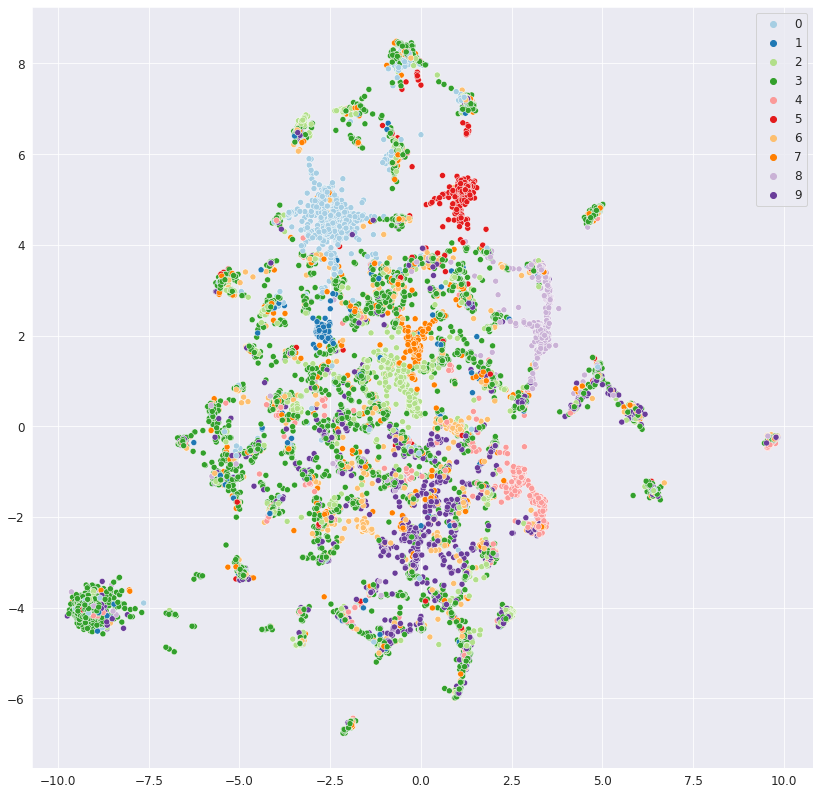

In [82]:
# Plotting things
sns.set_style("darkgrid")

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(14,14))
g = sns.scatterplot(*embeddings.T,
                    #reduced[:,0],reduced[:,1],
                   hue=clusterer.labels_,
                    palette="Paired",
                   legend='full')

## Bag of Words vectorization & logistic regression

The first approach we test here to determine whether a tweet is real or fake is a simple bag-of-words approach, where we count the number of times a word appears in a tweet and perform a logistic regression on that to determine how much a word contributes to a tweet being true or fake.

In [60]:
# Simple BoW vectorizer
vectorizer_BoW = CountVectorizer()
X_train_vec_BoW = vectorizer_BoW.fit_transform(X_train)

# Perform logistic regression
model_BoW = LogisticRegression(max_iter=2000) # Defines the model
model_BoW.fit(X_train_vec_BoW, y_train) # Training the model

# Test the model
X_test_vec_BoW = vectorizer_BoW.transform(X_test) # Transform the test set
print("BoW performance: " + str(model_BoW.score(X_test_vec_BoW, y_test))) # Check performance of the model

# Predict on new data
y_pred_BoW = model_BoW.predict(X_test_vec_BoW) # Predict on new data
pd.crosstab(y_test, y_pred_BoW) # Construct crosstabs on predictions

BoW performance: 0.8008819538670285


col_0  False  True 
row_0              
False   1153    323
True     264   1208

Here, we see that our model is approximately 80% efficient at discriminating between true and fake Trump tweets, which is not too bad. Also, the PPV is 0.82 and the recall is 0.79, which is quite decent.

Next, we look at which terms have the highest weights on predicting whether a tweet is real or fake.

In [80]:
eli5.show_weights(model_BoW, feature_names=vectorizer_BoW.get_feature_names(), target_names=['Ture','False'], top=30)

From this, we see that words like video, straight and sadly have positive weights, whereas words like whitehouse, foxnews and foxandfriends have negative weights.

Next, we can look at how good the model was at predicting the origin of tweets in general by calculating the difference between probabilities of predictions and whether the tweet is true (= 1) or false (= 0). We visualize this as a histogram, and values equal to 0 or close to 0 are correctly predicted.

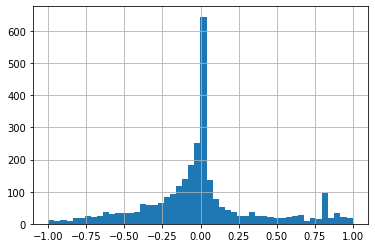

In [73]:
# Creates array of predicted probabilities of reviews.
preds_array_BoW = model_BoW.predict_proba(X_test_vec_BoW)

# Create dataframe from reviews, their predicted probabilities of being good, and whether they are good or bad.
predsDF_BoW = pd.DataFrame({"test":X_test, "pred_pos":preds_array_BoW[:,1], "y_test":y_test})

# Creates a column with the error of predictions. Values of 0 or close to 0 are close to being correctly predicted.
# Positive values are incorrectly predicted as being positive, while negative values are incorrectly predicted as being negative.
predsDF_BoW["diff_error"] = predsDF_BoW.pred_pos - predsDF_BoW.y_test

predsDF_BoW.diff_error.hist(bins=50)

As expected, the bulk of values were either 0 or close to 0, with a slight tendency towards predicting true tweets as being true with some uncertainty - hence the shoulder on the negative side.

## TF-IDF vectorization & logistic regression

The second approach we test here to determine whether a tweet is real or fake is a term frequency - inverse document frequency (TF-IDF) approach, in which the term-frequency is weighted against the document frequency, thereby giving more weights to rare terms.

In [85]:
# TF-IDF vectorizer
vectorizer_TFIDF = TfidfVectorizer()
X_train_vec_TFIDF = vectorizer_TFIDF.fit_transform(X_train)

# Perform logistic regression
model_TFIDF = LogisticRegression(max_iter=2000) # Defines the model
model_TFIDF.fit(X_train_vec_TFIDF, y_train) # Training the model

# Test the model
X_test_vec_TFIDF = vectorizer_TFIDF.transform(X_test) # Transform the test set
print("TF-IDF performance: " + str(model_TFIDF.score(X_test_vec_TFIDF, y_test))) # Check performance of the model

# Predict on new data
y_pred_TFIDF = model_TFIDF.predict(X_test_vec_TFIDF) # Predict on new data
pd.crosstab(y_test, y_pred_TFIDF) # Construct crosstabs on predictions

TF-IDF performance: 0.8097014925373134


col_0  False  True 
row_0              
False   1156    320
True     241   1231

Here, we see that our model is approximately 81% efficient at discriminating between true and fake Trump tweets, which is not too bad and slightly better than the bag-of-words vectorization approach. Also, the PPV is 0.83 and the recall is 0.79, which is quite decent and similar to that of the bag-of-words vectorization.

Next, we look at which terms have the highest weights on predicting whether a tweet is real or fake.

In [86]:
eli5.show_weights(model_TFIDF, feature_names=vectorizer_TFIDF.get_feature_names(), target_names=['Ture','False'], top=30)

Interestingly, even though the results for the TF-IDF vectorization are not different, the model has focussed on other terms than the bag-of-words vectorization. Now, the workds with the largest weights mostly have negative weights, however these still include some of the same terms as with the bag-of-words vectorization (*ie.* foxnews, foxandfriends and maga).

Next, we can look at how good the model was at predicting the origin of tweets in general by calculating the difference between probabilities of predictions and whether the tweet is true (= 1) or false (= 0). We visualize this as a histogram, and values equal to 0 or close to 0 are correctly predicted.

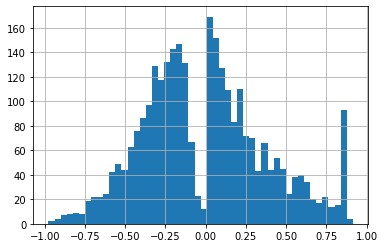

In [87]:
# Creates array of predicted probabilities of reviews.
preds_array_TFIDF = model_TFIDF.predict_proba(X_test_vec_TFIDF)

# Create dataframe from reviews, their predicted probabilities of being good, and whether they are good or bad.
predsDF_TFIDF = pd.DataFrame({"test":X_test, "pred_pos":preds_array_TFIDF[:,1], "y_test":y_test})

# Creates a column with the error of predictions. Values of 0 or close to 0 are close to being correctly predicted.
# Positive values are incorrectly predicted as being positive, while negative values are incorrectly predicted as being negative.
predsDF_TFIDF["diff_error"] = predsDF_TFIDF.pred_pos - predsDF_TFIDF.y_test

predsDF_TFIDF.diff_error.hist(bins=50)

Interestingly, the predictions also differed somewhat from the bag-of-words vectorization. While many of the terms were located at 0 with a tendency towards right-skewing with BoW, the TF-IDF predictions were more uniformly distributed towards the positive and negative side with fewer values on 0.